<a href="https://colab.research.google.com/github/amaye15/CanineNet/blob/main/code/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [13]:
%pip install datasets==2.15.0

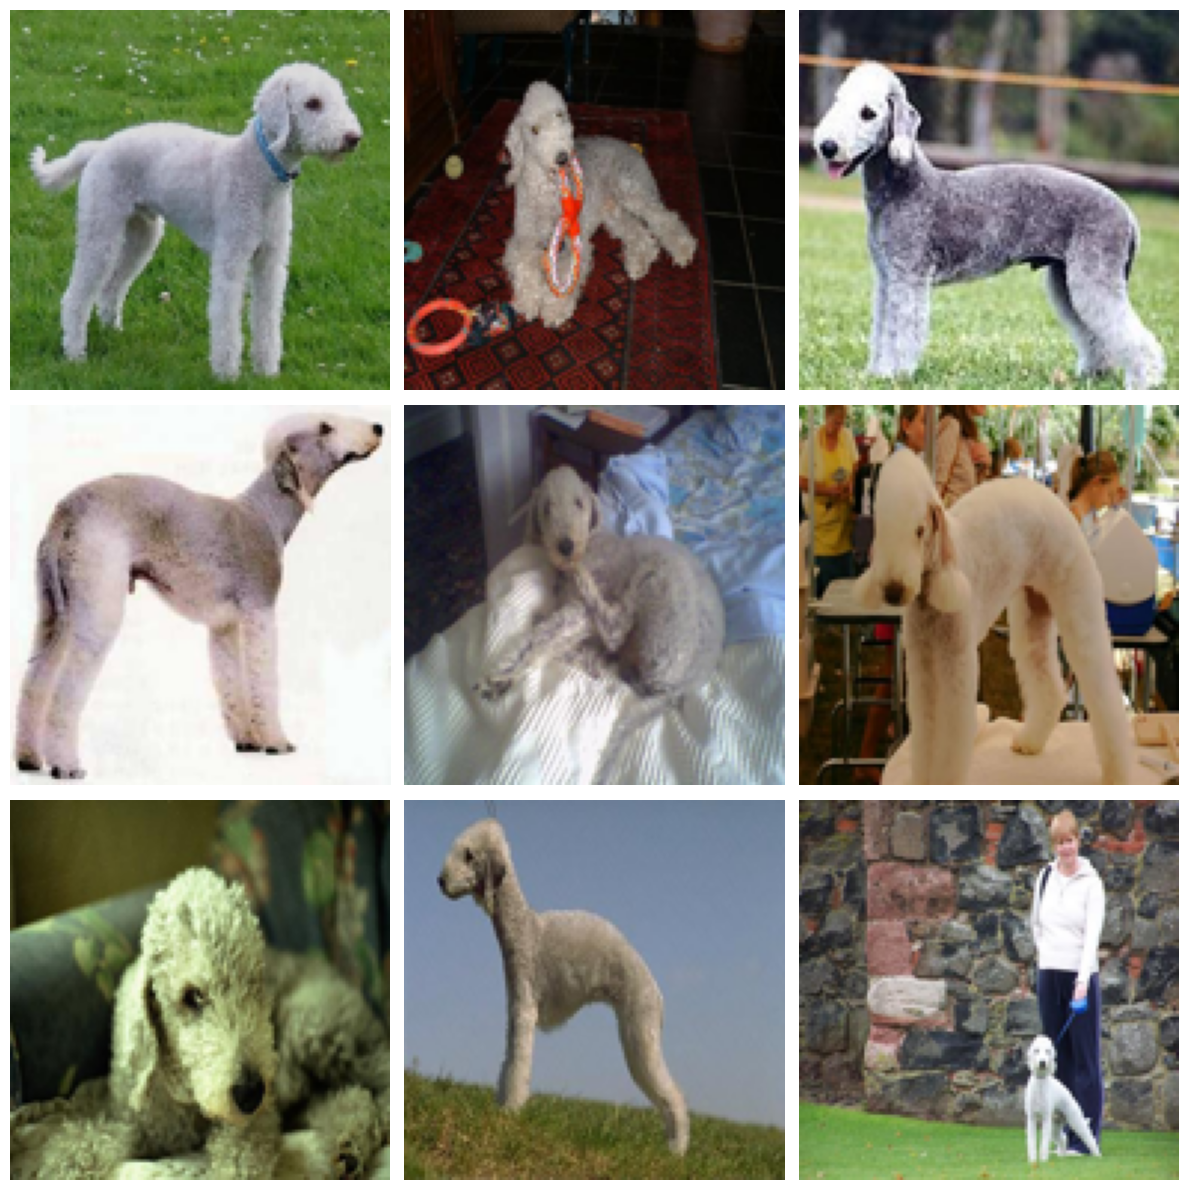

In [14]:
import io
import cv2
import datasets
import torch
import pyarrow_hotfix

from PIL import Image
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from functools import partial
from torchvision.transforms import v2

# Hotfix
pyarrow_hotfix.uninstall()

# Set image size
image_size = (256, 256)


# Load the dataset
dataset = datasets.load_dataset("Alanox/stanford-dogs", split="full")

# transformation = v2.RandAugment(num_ops = 10)
# dataset.set_transform(transformation)
# display_images(dataset)


def display_images(dataset, key = "image", number_of_images=9, image_size=(128, 128), grid_size=(3, 3)):
    """
    Displays a specified number of random images from a Hugging Face dataset in a grid layout.

    Parameters:
    dataset: The dataset to use.
    number_of_images (int): The number of images to display.
    image_size (tuple): The size (width, height) to which each image will be resized.
    grid_size (tuple): The grid size (rows, columns) for displaying the images.
    """

    # Shuffle the dataset
    shuffled_dataset = dataset#.shuffle(seed=np.random.randint(0, 1000))

    # Determine the number of rows and columns in the grid
    rows, cols = grid_size

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    for i, ax in enumerate(axes):
        if i < number_of_images:
            # Decode and resize the image
            image_data = shuffled_dataset[i][key]
            image = image_data
            image = image.resize(image_size)

            # Display the image
            ax.imshow(image)
            ax.axis('off')
        else:
            # Hide extra subplots if the number of images is less than grid cells
            ax.axis('off')

    plt.tight_layout()
    plt.show()

def transforms(examples, transformation_function):
    examples["image"] = [transformation_function(image.convert("RGB")) for image in examples["image"]]
    return examples

display_images(dataset)

# Dataset Information

In [15]:
dataset

Dataset({
    features: ['name', 'annotations', 'target', 'image'],
    num_rows: 20580
})

# Images per Class

In [16]:
df = datasets.load_dataset("Alanox/stanford-dogs", split="full").remove_columns(["name", "annotations", "image"]).to_pandas().value_counts().reset_index().reset_index().rename(columns={"index": "label", 0: "count"})

px.bar(df, x = "target", y = "count")

# Scale Jitter

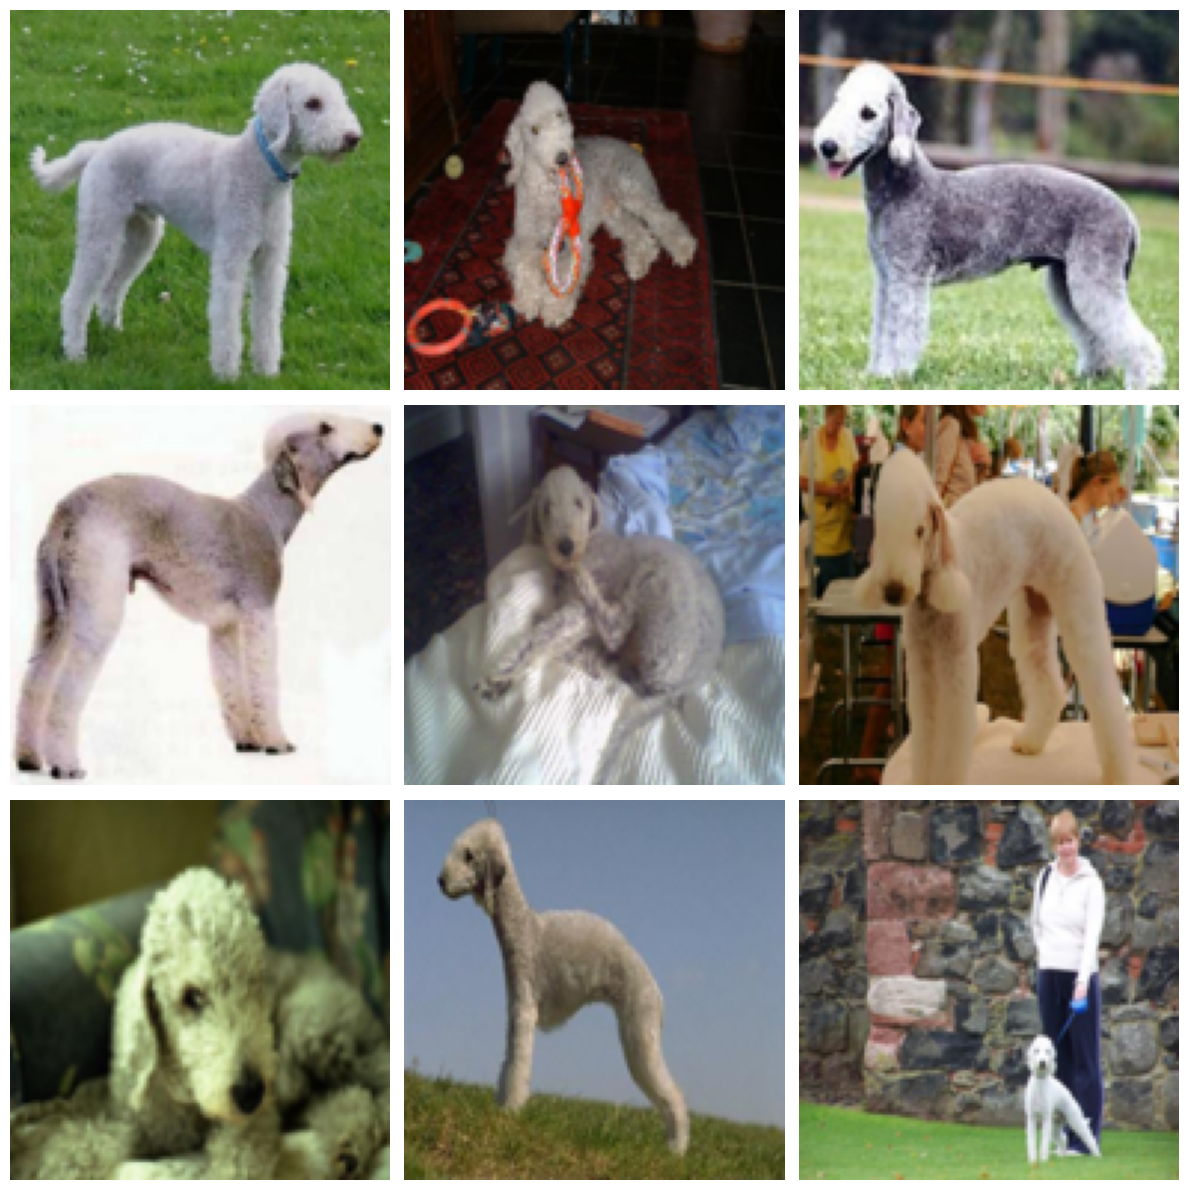

In [17]:
transformation = v2.Compose([v2.Resize(size = image_size), v2.ScaleJitter(target_size = image_size)])
dataset.set_transform(transformation)
display_images(dataset)

# Color Jitter

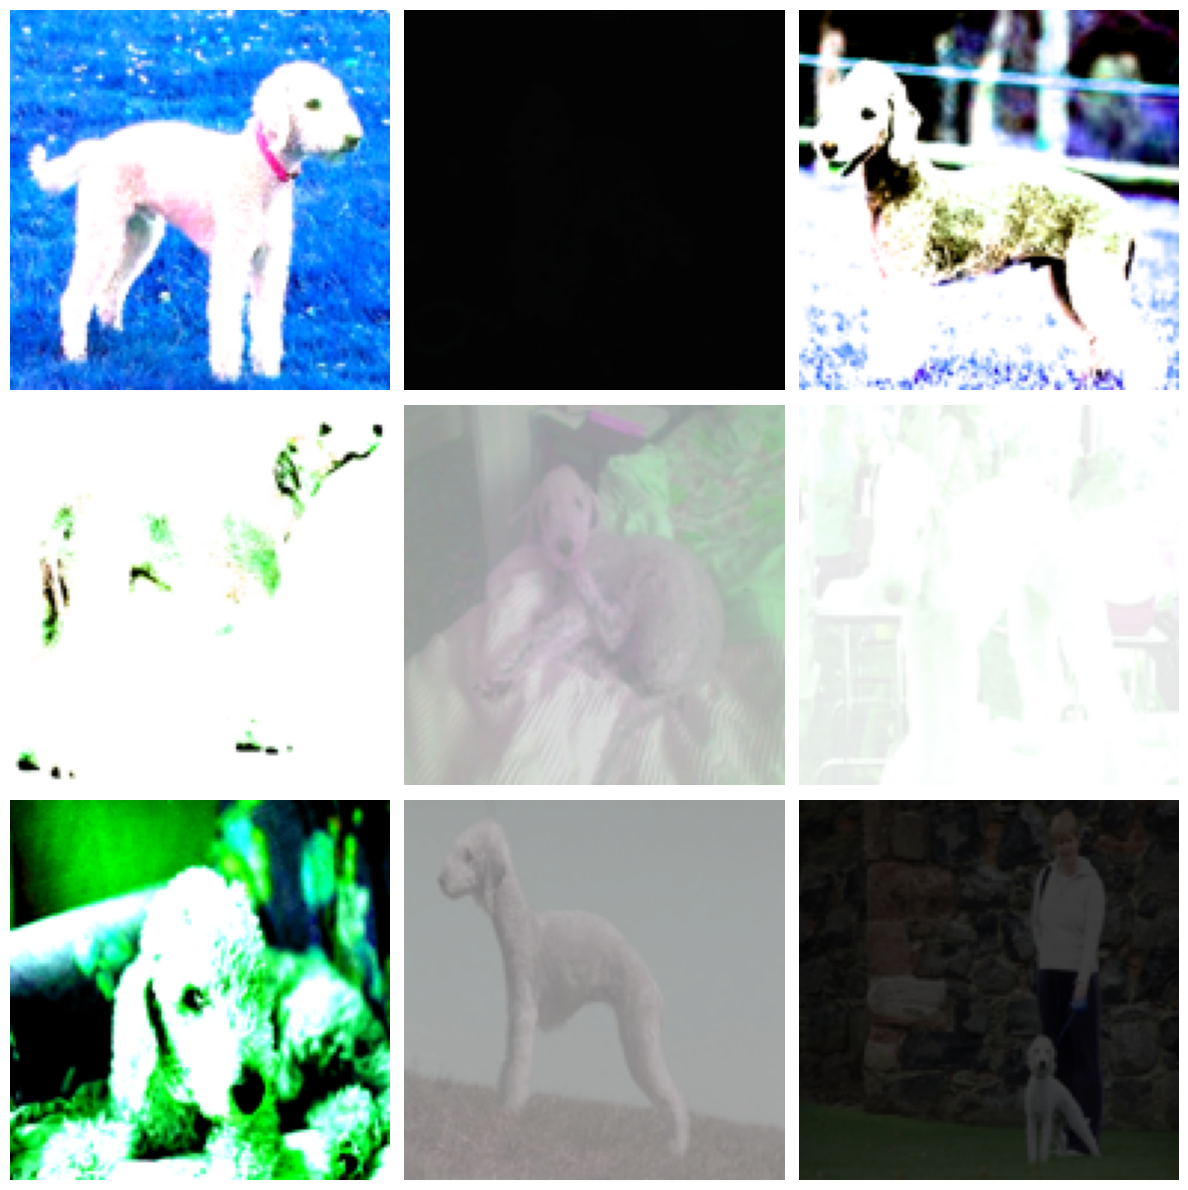

In [18]:
transformation = v2.Compose([v2.Resize(size = image_size), v2.ColorJitter(brightness=2.0, contrast=1.0, saturation=1.0, hue=0.5)])
dataset.set_transform(transformation)
display_images(dataset)

# Gaussian Blur

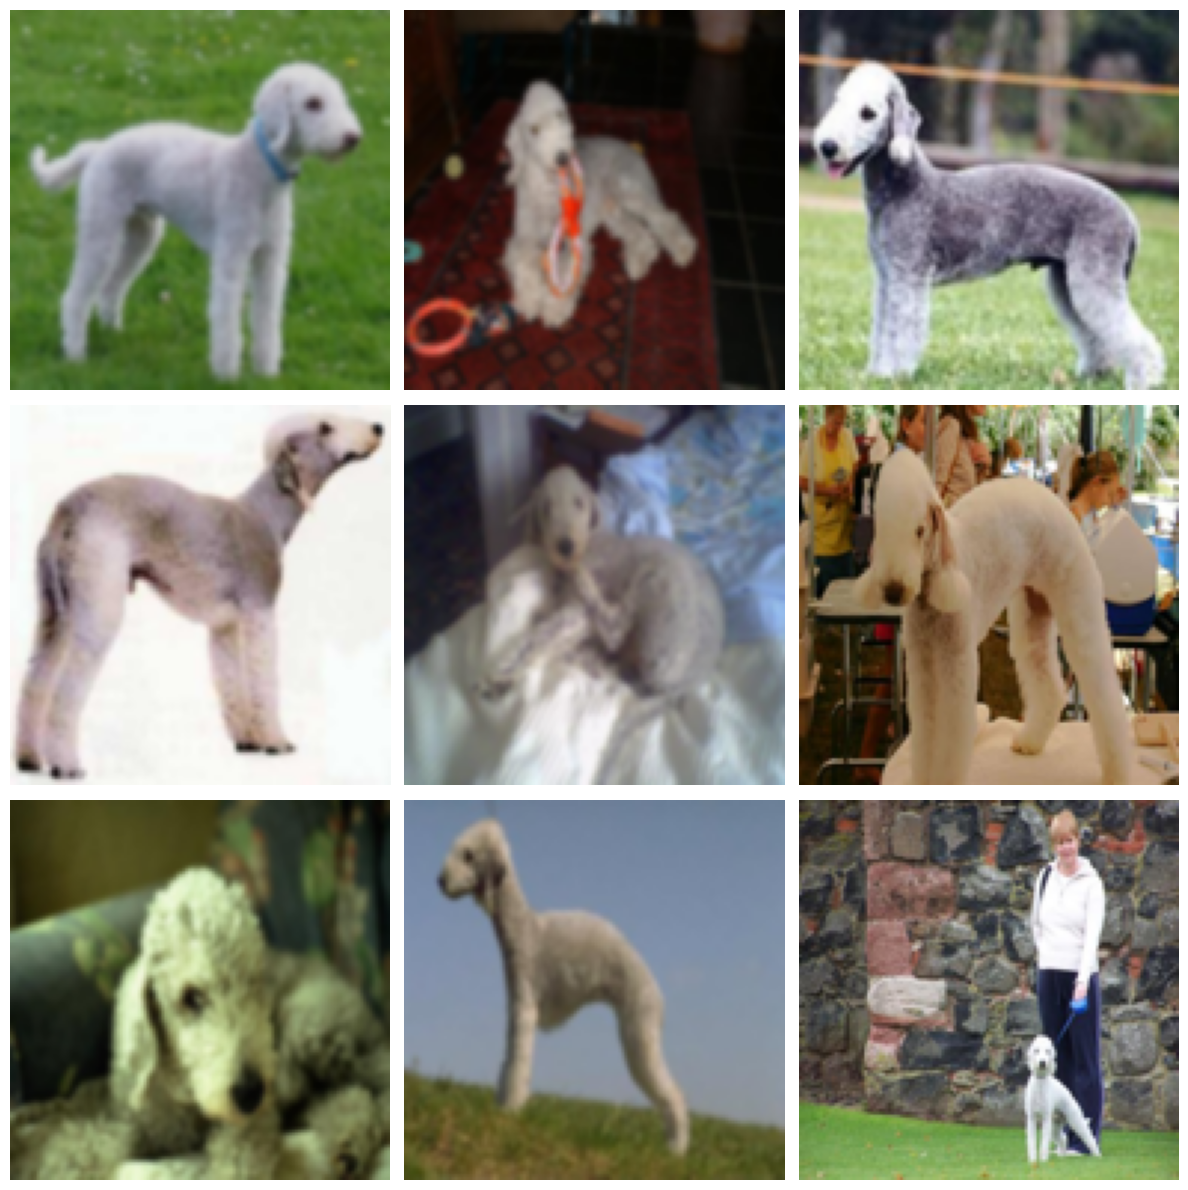

In [19]:
transformation = v2.Compose([v2.Resize(size = image_size), v2.GaussianBlur(29)])
dataset.set_transform(transformation)
display_images(dataset)

# Random Equalize

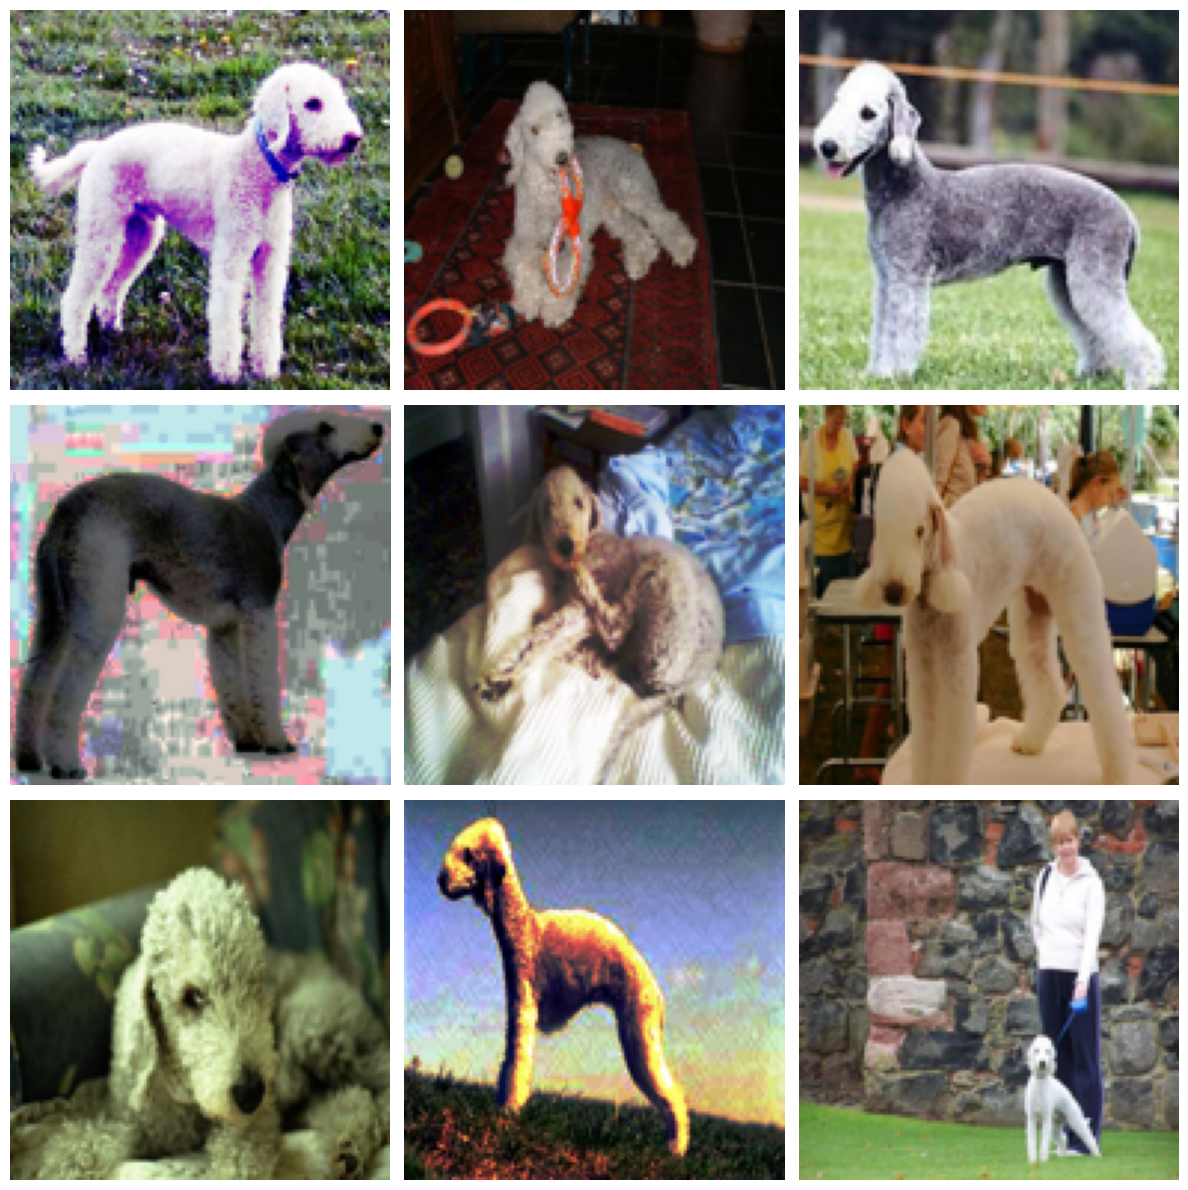

In [20]:
transformation = v2.Compose([v2.Resize(size = image_size), v2.RandomEqualize()])
dataset.set_transform(transformation)
display_images(dataset)